<a href="https://colab.research.google.com/github/imp-etus/Seattle-Weather/blob/main/Data%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

The purpose of this notebook is to perform analyses on cleaned data from the NOAA Weather Service to answer the question: "Does it rain more in Seattle or St. Louis?" and to display those answers in graph form. We use precipitation data from 2018-2022 to answer our question.

More specifically, this notebook uses precipitation data from the Seattle & St. Louis airports' weather station. The data was cleaned by [this notebook](https://github.com/imp-etus/Seattle-Weather/blob/main/Data%20Preparation.ipynb). The source of the data is found [here](https://www.ncei.noaa.gov/cdo-web/search?datasetid=GHCND), but for the sake of reproducibility the original csv's extracted from there can be found [for Seattle](https://github.com/imp-etus/Seattle-Weather/blob/main/seattle_rain.csv) and [for St. Louis](https://github.com/imp-etus/Seattle-Weather/blob/main/stl_rain.csv). 



## Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

## Load clean data

##### $\rightarrow$ Load the clean data set from Github. 

In [3]:
df_base = pd.read_csv("https://raw.githubusercontent.com/imp-etus/Seattle-Weather/main/basic_tidy.csv")
df_monthly = pd.read_csv("https://raw.githubusercontent.com/imp-etus/Seattle-Weather/main/monthly_rain.csv")
df_monthly_true = pd.read_csv("https://raw.githubusercontent.com/imp-etus/Seattle-Weather/main/true_monthly_rain.csv")
df_yearly = pd.read_csv("https://raw.githubusercontent.com/imp-etus/Seattle-Weather/main/yearly_rain.csv")
df_monthly_max = pd.read_csv("https://raw.githubusercontent.com/imp-etus/Seattle-Weather/main/monthly_max.csv")

##### $\rightarrow$ Review the contents of the data set.

df_base is a data table that merges Seattle & St. Louis data into one table, while also replacing missing values with the average of that day's results in other years (so, for instance, if 1/1/2018 is missing precipitation, then it will be replaced with the average of all other January 1sts, and so on). 

df_monthly takes df_base and calculates the daily rain average per month, but separates results by year.

df_monthly_true does the same thing that df_monthly does, but it aggregates years before calculating. As a result, there are (roughly) 5x the data points and outlier years are made less effective.

df_yearly calculates the daily rain average over yearly intervals. 

df_monthly_max finds the day with the heaviest rain in each month per city.

## State your questions

The overall problem is to compare how much it rains in Seattle and St. Louis. To answer this general problem, you will need to ask specific questions about the data.


Does it rain more on average in Seattle or St. Louis? 

$\rightarrow$ Does that change if we compare on a year-to-year basis? What about month-to-month? 

Which city has the rainiest day in each month? 

## Analysis

Perform analyses necessary to answer the questions. You will likely start by trying many things, some of which are useful and some of which are not. Don't be afraid to try different analyses at first. You will edit your notebook to a clean version that retains only the essential components at the end of the project.

This just creates a basic bar graph for the yearly data, in order to see whether it rains more year-over-year.

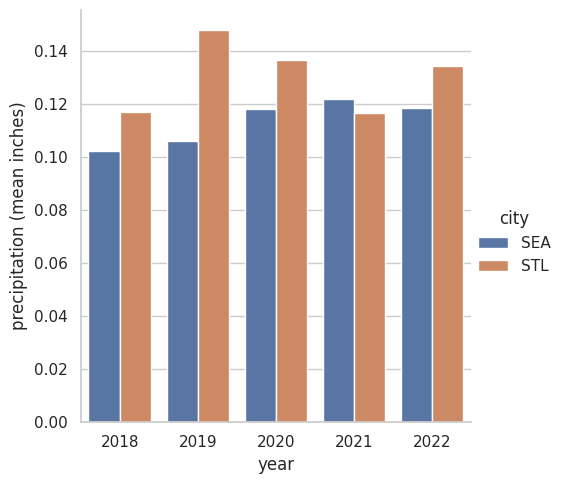

In [4]:
yearly_plot = sns.catplot(kind='bar', data=df_yearly, x='day', y='precipitation', hue='city')
yearly_plot.set_axis_labels("year", "precipitation (mean inches)")

As we can see, it rains more in St. Louis in 4 of 5 years in the dataset (every year but 2021). St. Louis's rain has 3 years that exceed 0.12 inches per day, whereas Seattle only exceeds that in 2021.

This sets up a plot of all 5 years by month in a line, so that you can track how the rain changes year-over-year. Additionally, I've changed the months to reflect their names rather than just a number.

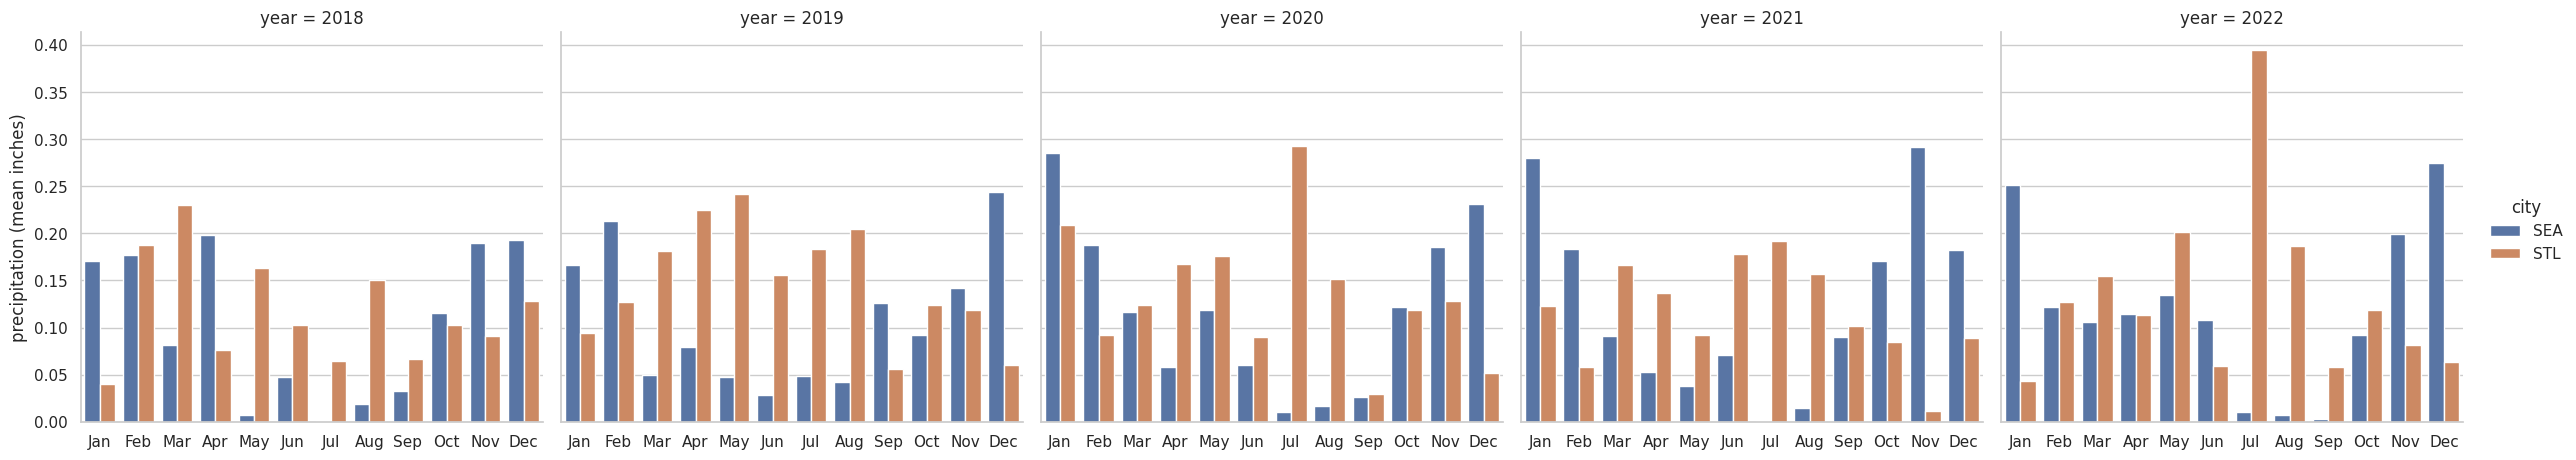

In [5]:
monthly_plot = sns.catplot(kind='bar', data=df_monthly, x='month', y='precipitation', hue='city', col='year')
monthly_plot.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
monthly_plot.set_axis_labels("", "precipitation (mean inches)")

Something interesting here is that St. Louis has rainy summers and (relatively) dry winters - especially in, say, 2022, the middle of the year rains more than the start or end. On the other hand, Seattle has dry summers and wet winters, and so while St. Louis *generally* had more rain year-over-year, Seattle still gets more rain in some months. This is more visible in the next graph.

This just takes the months from the previous graph and combines them together so that we can compare months to months rather than years to years. 

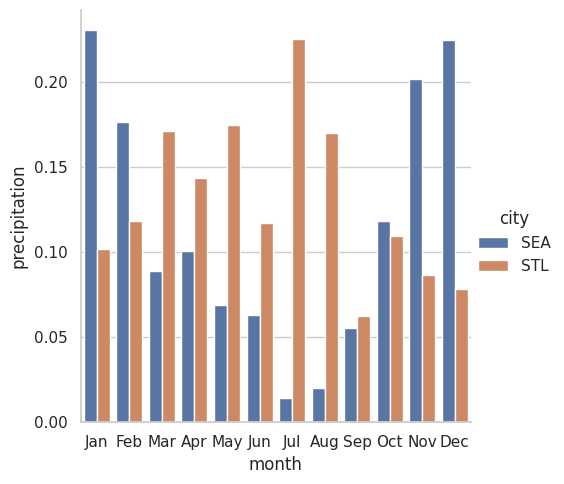

In [7]:
true_monthly_plot = sns.catplot(kind='bar', data=df_monthly_true, x='month', y='precipitation', hue='city')
true_monthly_plot.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

In this graph, we can see the "wet winters / dry summers" of Seattle vs "dry-ish winters, wet summers" of St. Louis far more clearly. For example, looking at July and August, Seattle gets next to no rain. However, in November through February in Seattle, we see more than 0.15 inches per day - a notable difference from May through September. 

This finds the rainiest day in each month. Same as the other graphs, just plotting a bar chart.

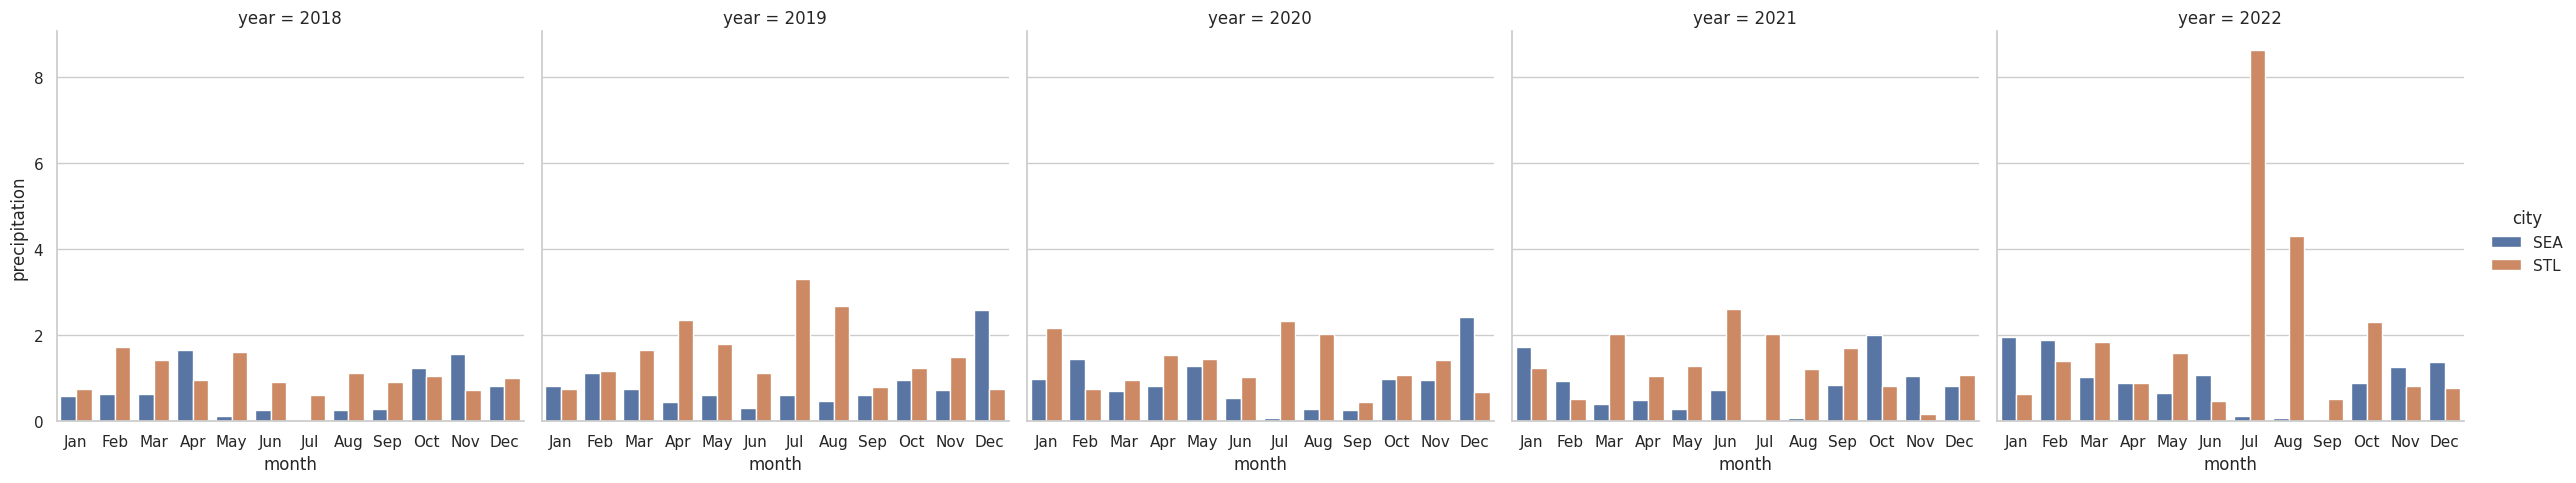

In [8]:
max_monthly = sns.catplot(kind='bar', data=df_monthly_max, x='month', y='precipitation', hue='city', col='year')
max_monthly.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])


It's distorted pretty heavily by July and August 2022 in St. Louis, which is worth looking into - perhaps there was flooding that year? However, we see the same general trend as we've seen in the other months - more rain generally from St. Louis, but Seattle has its times (mostly in the winter months) where it rains more there.

### Results for communication assignment

Here are the graphs removed from their analyses for later:

In order: average by year, average by month, average by month (aggregating years), maximum by month.

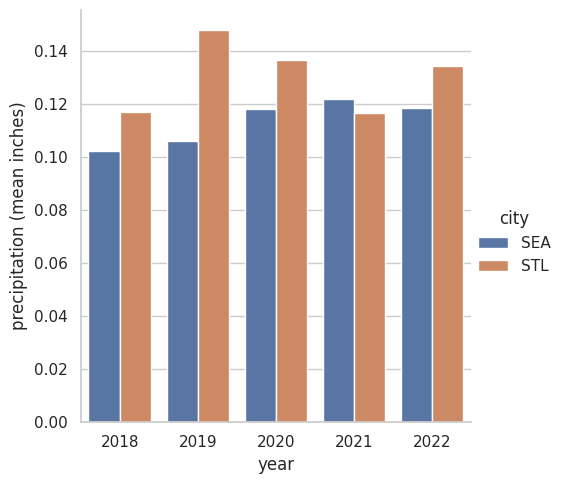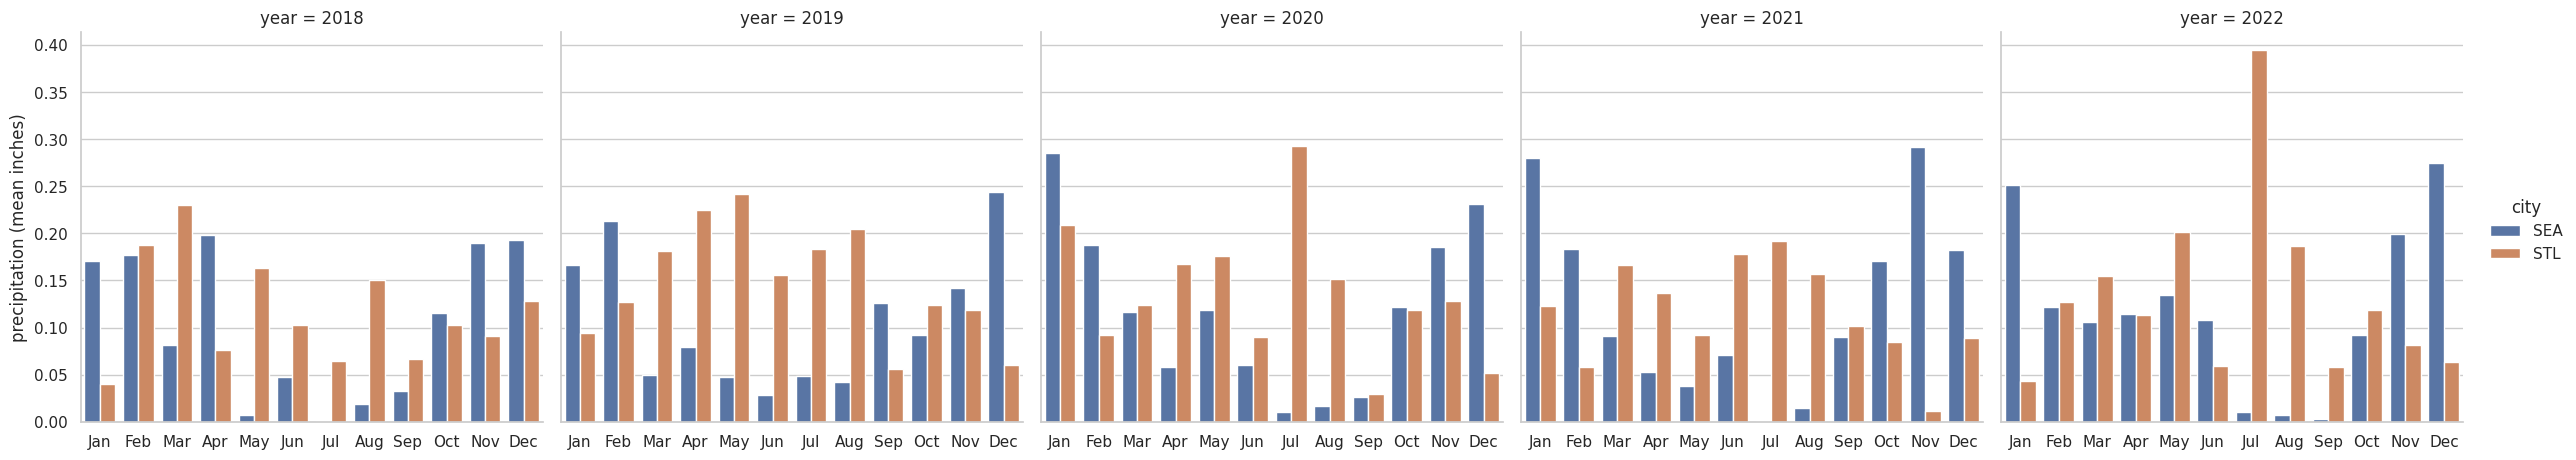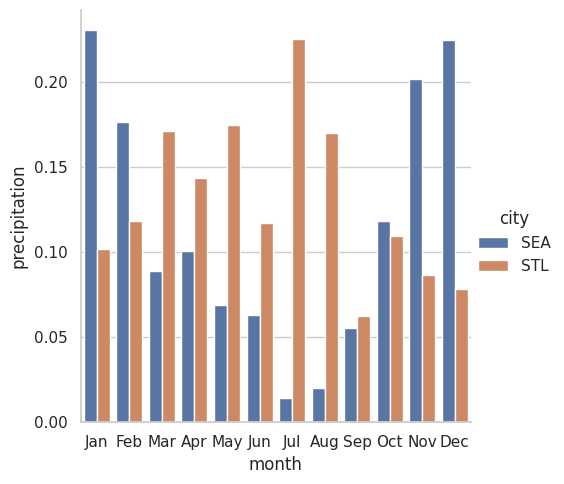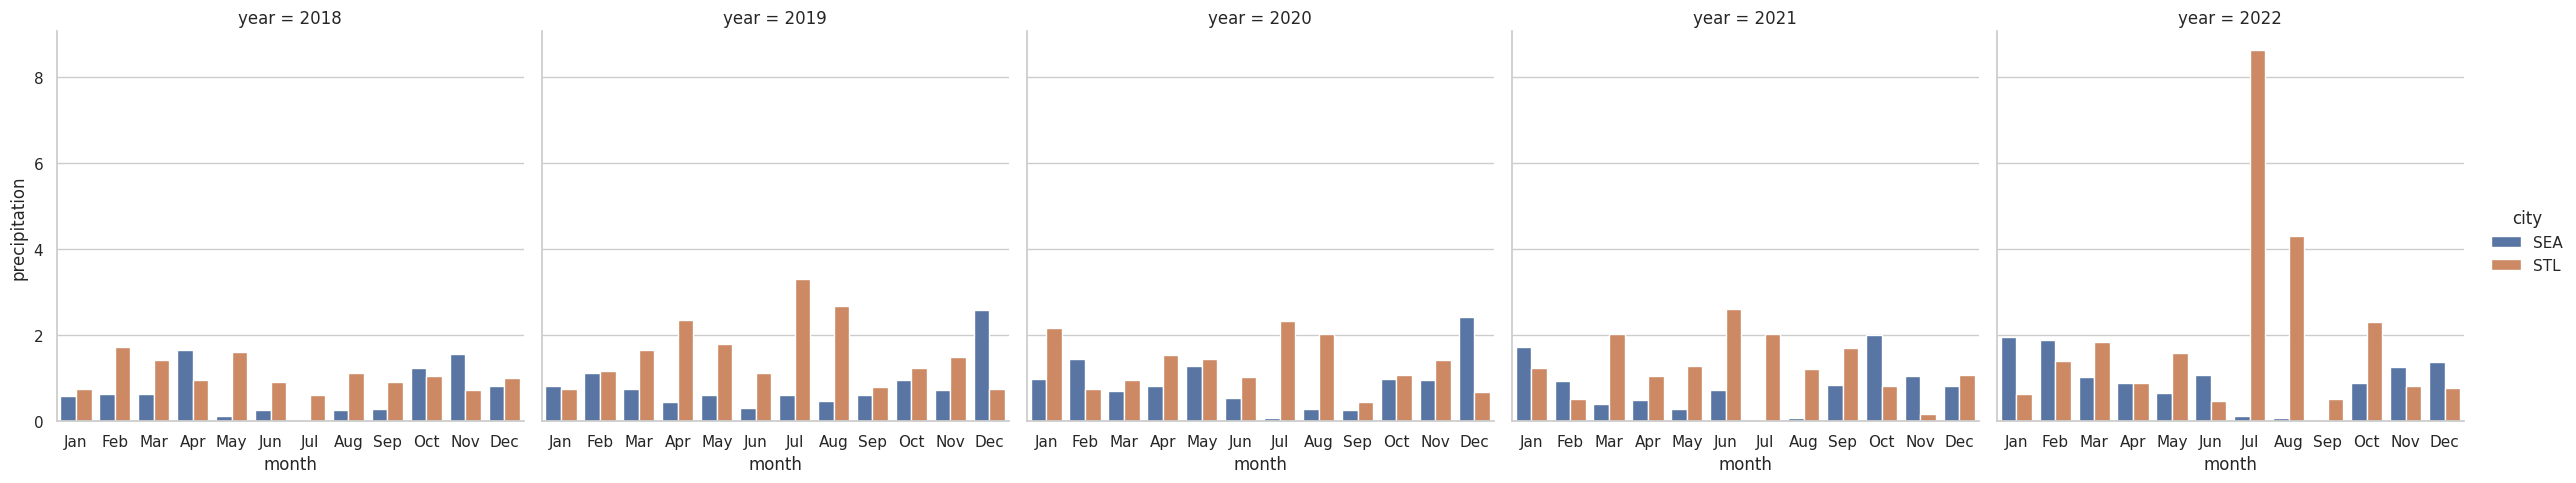

## Conclusion

It rains more in St. Louis year over year. In 4 out of 5 years (2018, 2019, 2020, 2022) St. Louis gets more rain day-to-day, and in 2021 the difference between Seattle & St. Louis's rain is significantly less than in, say, 2019. 

However, it rains more in Seattle during late fall and winter (October through February). This can be seen from the df_yearly plot. We can thus conclude that St. Louis has rainy summers, while Seattle has rainy winters. 

As such, we can conclude that *in general* it rains more in St. Louis, but there are months in Seattle that will be rainier than in St. Louis. 